## Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Analysis on Review Dataset

In [10]:
df1=pd.read_csv("review_dataset.csv")
df1.head()

,product_name,product_url,category,status,stars
0,Sony PlayStation PS2 Gaming Console 150 GB Har...,https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,5.0 star rating
1,Vmax HX 750 Quadcopter Drone (No Camera),https://yoshops.com/products/hx-750-remote-con...,Toys & Games,Reviewd,5.0 star rating
2,Yoshops VR BOX Virtual Reality Glasses Headset...,https://yoshops.com/products/yoshops-vr-box-vi...,Toys & Games,Reviewd,5.0 star rating
3,Sony PlayStation PS3 Console Slim 320 GB (Black),https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,4.9 star rating
4,Barbie Doll (pink),https://yoshops.com/products/barbie-doll,Toys & Games,Reviewd,4.9 star rating


In [11]:
 df1.shape

(1861, 5)

In [12]:
df1.columns

Index(['product_name', 'product_url', 'category', 'status', 'stars'], dtype='object')

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  1861 non-null   object
 1   product_url   1861 non-null   object
 2   category      1861 non-null   object
 3   status        606 non-null    object
 4   stars         606 non-null    object
dtypes: object(5)
memory usage: 72.8+ KB


#### Cleaning the dataset

In [14]:
#dropping unnecessary columns
df1=df1.drop(['product_url'],axis=1)
df1.head()

,product_name,category,status,stars
0,Sony PlayStation PS2 Gaming Console 150 GB Har...,Toys & Games,Reviewd,5.0 star rating
1,Vmax HX 750 Quadcopter Drone (No Camera),Toys & Games,Reviewd,5.0 star rating
2,Yoshops VR BOX Virtual Reality Glasses Headset...,Toys & Games,Reviewd,5.0 star rating
3,Sony PlayStation PS3 Console Slim 320 GB (Black),Toys & Games,Reviewd,4.9 star rating
4,Barbie Doll (pink),Toys & Games,Reviewd,4.9 star rating


In [15]:
#cleaning the stars column
df1['stars'].unique()

array(['5.0 star rating', '4.9 star rating', '4.6 star rating',
       '4.8 star rating', '4.0 star rating', nan, '3.0 star rating',
       '2.3 star rating', '4.3 star rating', '4.7 star rating',
       '3.3 star rating', '4.2 star rating', '4.5 star rating'],
      dtype=object)

In [16]:
# converting the values in stars column into float values
def handlestars(value):
        value=str(value).split(' ')
        value=value[0]
        return float(value)

df1['stars']=df1['stars'].apply(handlestars)
df1['stars'].head()

0    5.0
1    5.0
2    5.0
3    4.9
4    4.9
Name: stars, dtype: float64

In [17]:
df1['stars'].unique()

array([5. , 4.9, 4.6, 4.8, 4. , nan, 3. , 2.3, 4.3, 4.7, 3.3, 4.2, 4.5])

Stars column is clean

In [18]:
#dropping nan values
df1.dropna(inplace=True)
df1.head()

,product_name,category,status,stars
0,Sony PlayStation PS2 Gaming Console 150 GB Har...,Toys & Games,Reviewd,5.0
1,Vmax HX 750 Quadcopter Drone (No Camera),Toys & Games,Reviewd,5.0
2,Yoshops VR BOX Virtual Reality Glasses Headset...,Toys & Games,Reviewd,5.0
3,Sony PlayStation PS3 Console Slim 320 GB (Black),Toys & Games,Reviewd,4.9
4,Barbie Doll (pink),Toys & Games,Reviewd,4.9


In [19]:
 df1.shape

(606, 4)

## Visualization

### 1.To see the analysis of Reviews given by Customers

#### Visualizing Category vs Stars

In [20]:
df2=df1.groupby(['category','stars'])['product_name'].count()
df2.to_csv('category_stars.csv')
df2=pd.read_csv('category_stars.csv')
df2=pd.pivot_table(df2,values=None,index=['category'],columns=['stars'],fill_value=0,aggfunc=np.sum)
df2.head()

product_name                                            
stars                     2.3 3.0 3.3 4.0 4.2 4.3 4.5 4.6 4.7 4.8 4.9 5.0
category                                                                 
Accessories                 0   0   0   0   1   0   1   1   1   0   1  21
Auto spare parts            0   0   0   0   0   0   0   0   0   0   0   1
Bags                        0   0   0   0   0   0   0   0   0   0   0   3
Bengaluru                   0   0   0   0   0   0   0   1   0   0   0  39
Biryani                     0   0   0   0   0   0   0   0   0   0   0   2

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'Toys & Games'),
  Text(1, 0, 'PlayStation'),
  Text(2, 0, 'Drones'),
  Text(3, 0, 'RC Toys'),
  Text(4, 0, 'Gaming Accessories'),
  Text(5, 0, 'Mobiles'),
  Text(6, 0, 'Smartphones'),
  Text(7, 0, 'Headphones'),
  Text(8, 0, 'Mobiles Accessories'),
  Text(9, 0, 'Feature Keypad Mobiles'),
  Text(10, 0, 'Laptops'),
  Text(11, 0, 'Gaming Laptops'),
  Text(12, 0, 'Personal Laptops'),
  Text(13, 0, 'Tablets'),
  Text(14, 0, 'Laptop Accessories'),
  Text(15, 0, 'Computers Accessories'),
  Text(16, 0, 'Accessories'),
  Text(17, 0, 'Bags'),
  Text(18, 0, 'SpareParts'),
  Text(19, 0, 'Auto spare parts'),
  Text(20, 0, 'Mobile Spare Parts'),
  Text(21, 0, 'Laptop spare parts'),
  Text(22, 0, 'More'),
  Text(23, 0, 'Electronics'),
  Text(24, 0, 'Led TV'),
  Tex

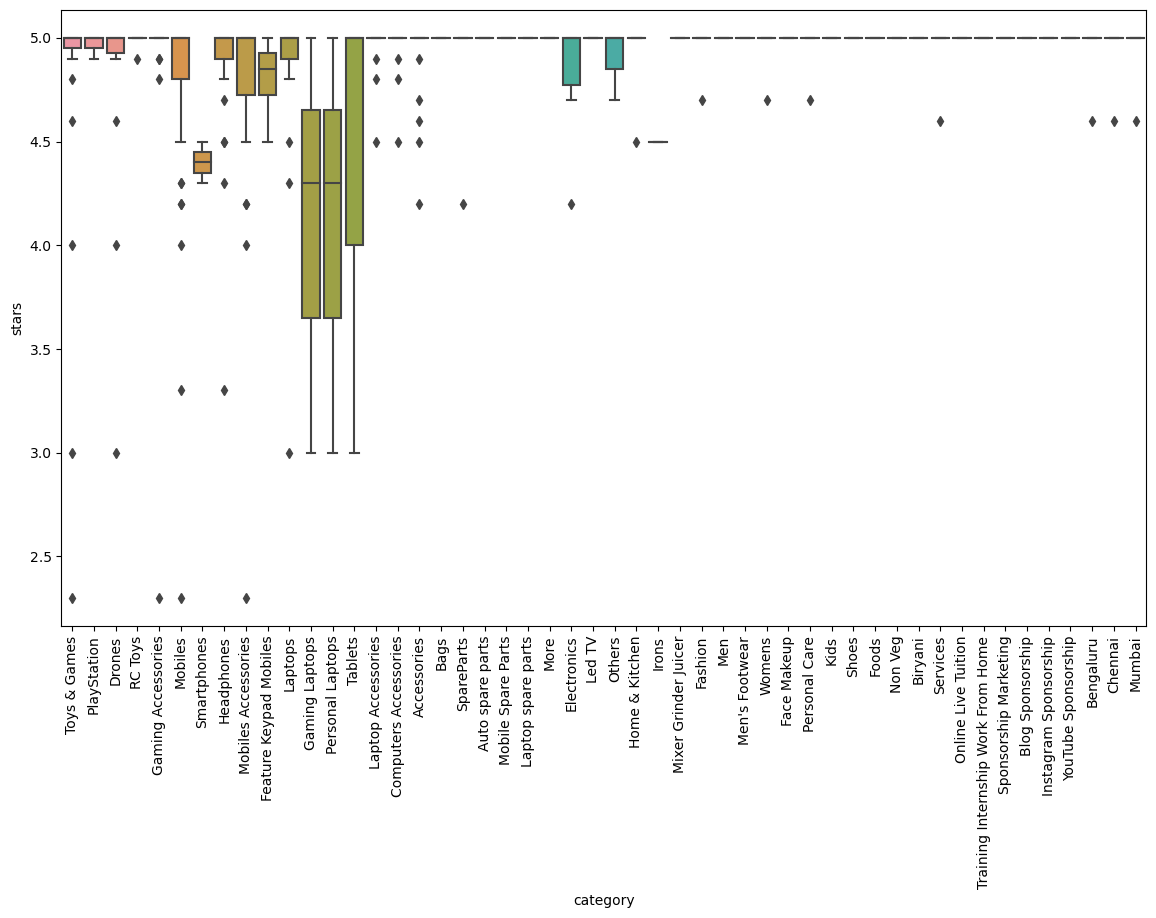

In [21]:
plt.figure(figsize=(14,8))
sns.boxplot(x='category',y='stars',data=df1)
plt.xticks(rotation=90)

From the above graph we can understand the range of stars each categories got.

In [22]:
# extracting orders that got 5 stars
fivestar_review=df1[df1['stars']==5]
fivestar_review

,product_name,category,status,stars
0,Sony PlayStation PS2 Gaming Console 150 GB Har...,Toys & Games,Reviewd,5.0
1,Vmax HX 750 Quadcopter Drone (No Camera),Toys & Games,Reviewd,5.0
2,Yoshops VR BOX Virtual Reality Glasses Headset...,Toys & Games,Reviewd,5.0
6,Puppy House Coin Piggy Bank,Toys & Games,Reviewd,5.0
7,The Amazing Spider Man Micro Drone Q Series Hy...,Toys & Games,Reviewd,5.0
...,...,...,...,...
1847,OLIFAIR Alkaline De-Tan Cream White - 350 gm (...,Mumbai,Reviewd,5.0
1848,YouTuber Akshay Bhansali YouTube Channel name ...,Mumbai,Reviewd,5.0
1849,Hindi Class For STD 1 to STD 10 Free 5 Demo Class,Mumbai,Reviewd,5.0
1852,Hammer Smart Watch Pulse 2.0 with Blood Oxygen...,Mumbai,Reviewd,5.0


In [23]:
df3=fivestar_review.groupby(['category','stars'])['product_name'].count()
df3.to_csv('category_stars.csv')
df3=pd.read_csv('category_stars.csv')
df3=pd.pivot_table(df3,values=None,index=['category'],columns=['stars'],fill_value=0,aggfunc=np.sum)
df3

,product_name
stars,5.0
category,
Accessories,21
Auto spare parts,1
Bags,3
Bengaluru,39
Biryani,2
Blog Sponsorship,2
Chennai,39
Computers Accessories,13


<AxesSubplot:xlabel='category'>

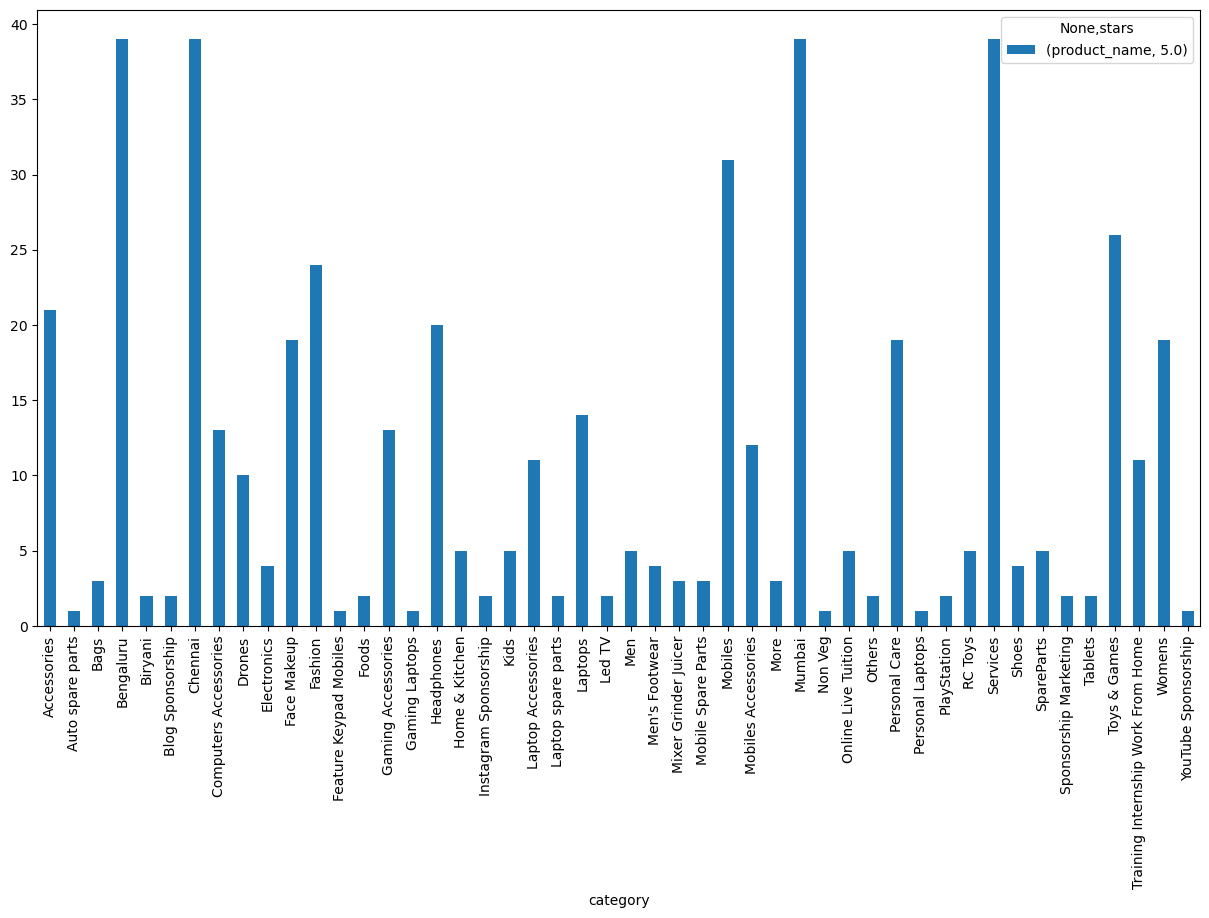

In [24]:
df3.plot(kind='bar',figsize=(15,8))

From the above graph we can understand the amount of 5 stars each categories got
* Category mobiles got highest number of 5 stars
* Categories Auto spare parts,Irons,Non_veg and Youtube sponsorship got least number of 5 stars

### 6.To see the analysis of Reviews for All Product Categories

#### Visualizing Category, Status wise

In [25]:
df1=df1.groupby(['category','status'])['product_name'].count()
df1.to_csv('category_status.csv')
df1=pd.read_csv('category_status.csv')
df1=pd.pivot_table(df1,values=None,index=['category'],columns=['status'],fill_value=0,aggfunc=np.sum)
df1

,product_name
status,Reviewd
category,
Accessories,26
Auto spare parts,1
Bags,3
Bengaluru,40
Biryani,2
Blog Sponsorship,2
Chennai,40
Computers Accessories,16


<AxesSubplot:xlabel='category'>

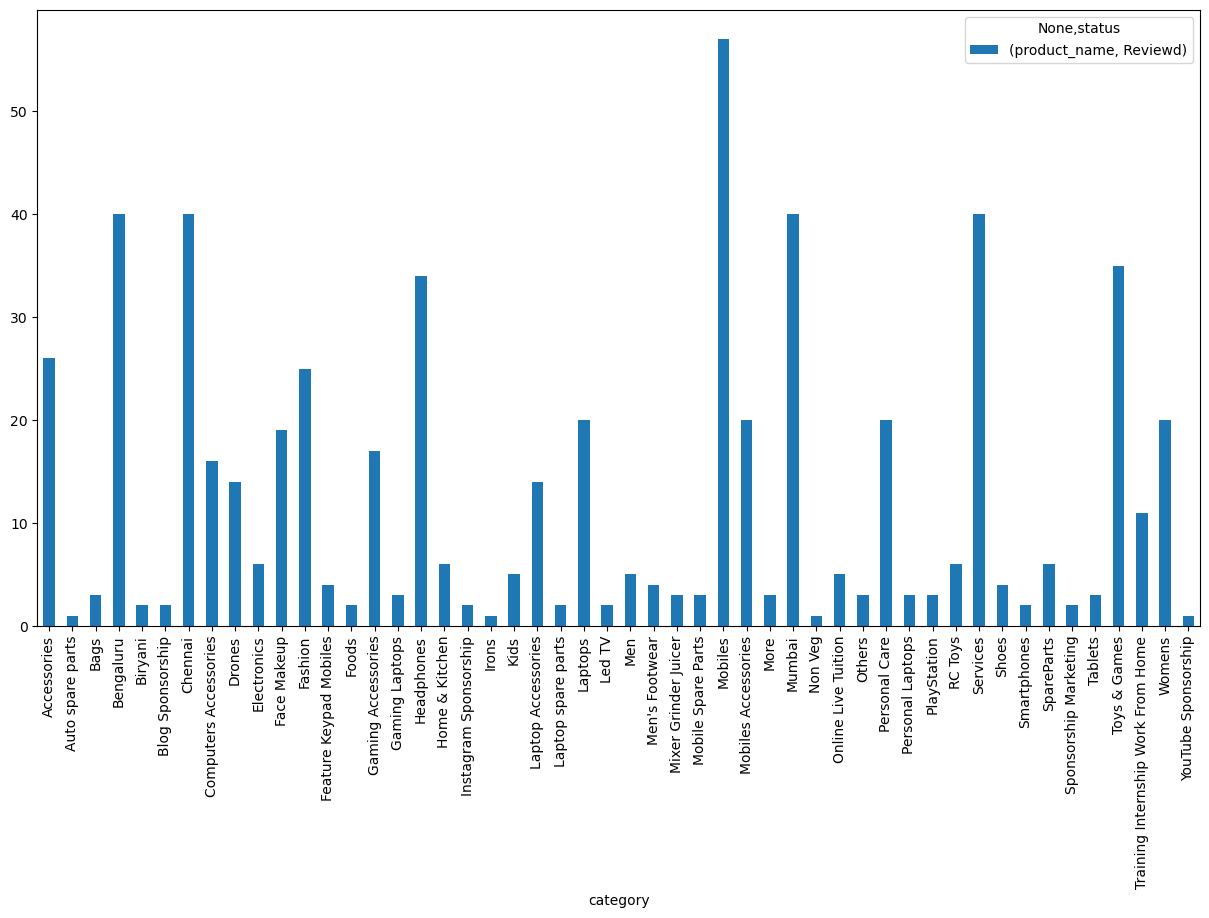

In [26]:
df1.plot(kind='bar',figsize=(15,8))

From the above graph we can understand the amount of reviews got for each product category
* Category Mobiles got highest amount of reviews
* Ctegories Auto spare parts,Irons, Non_veg and Youtube sponsorship got least amount of reviews

### Analysis on Orders Dataset

In [27]:
#reading the dataset
df4=pd.read_csv('orders_2016-2020_Dataset (1).csv')
df4.head()

,Order #,Order Date and Time Stamp,Fulfillment Status,Payment Status,Payment Date and Time Stamp,Fulfillment Date and Time Stamp,Currency,Subtotal,Shipping Method,Shipping Cost,...,Payment Method,Tracking #,Special Instructions,LineItem Name,LineItem SKU,LineItem Options,LineItem Add-ons,LineItem Qty,LineItem Sale Price,LineItem Type
0,R929392577,09-11-2020 20:36,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical
1,R653462960,09-11-2020 20:18,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Samsung U Flex Wireless Bluetooth Flexible Hea...,PL000032123,NaN,NaN,1,₹ 699.00,physical
2,R226302759,09-11-2020 19:56,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical
3,R390235057,09-11-2020 19:37,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 599.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,JBL Tempo On-Ear Headphone,PL000157,NaN,NaN,1,₹ 599.00,physical
4,R813855117,09-11-2020 18:35,Cancelled,Paid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Mi Neckband Bluetooth Headset with Mic (Black),PL000041332,NaN,NaN,1,₹ 699.00,physical


In [28]:
df4.shape

(2297, 41)

In [29]:
df4.columns

Index(['Order #', 'Order Date and Time Stamp', 'Fulfillment Status',
       'Payment Status', 'Payment Date and Time Stamp',
       'Fulfillment Date and Time Stamp', 'Currency', 'Subtotal',
       'Shipping Method', 'Shipping Cost', 'Tax Method', 'Taxes', 'Total',
       'Coupon Code', 'Coupon Code Name', 'Discount', 'Billing Name',
       'Billing Country', 'Billing Street Address', 'Billing Street Address 2',
       'Billing City', 'Billing State', 'Billing Zip', 'Shipping Name',
       'Shipping Country', 'Shipping Street Address',
       'Shipping Street Address 2', 'Shipping City', 'Shipping State',
       'Shipping Zip', 'Gift Cards', 'Payment Method', 'Tracking #',
       'Special Instructions', 'LineItem Name', 'LineItem SKU',
       'LineItem Options', 'LineItem Add-ons', 'LineItem Qty',
       'LineItem Sale Price', 'LineItem Type'],
      dtype='object')

In [30]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Order #                          2297 non-null   object 
 1   Order Date and Time Stamp        2297 non-null   object 
 2   Fulfillment Status               2297 non-null   object 
 3   Payment Status                   2297 non-null   object 
 4   Payment Date and Time Stamp      240 non-null    object 
 5   Fulfillment Date and Time Stamp  229 non-null    object 
 6   Currency                         2297 non-null   object 
 7   Subtotal                         2297 non-null   object 
 8   Shipping Method                  2297 non-null   object 
 9   Shipping Cost                    2297 non-null   object 
 10  Tax Method                       1 non-null      object 
 11  Taxes                            2297 non-null   object 
 12  Total               

#### Cleaning the dataset

In [31]:
# dropping unwanted columns
df4=df4.drop(['Fulfillment Status','Subtotal','Payment Date and Time Stamp','Fulfillment Date and Time Stamp','Currency','Shipping Method','Shipping Cost','Tax Method','Taxes','Coupon Code','Coupon Code Name','Billing Name','Billing Street Address','Billing Street Address 2','Billing Zip','Shipping Name','Shipping Street Address','Shipping Street Address 2','Shipping Zip','Gift Cards','Tracking #','Special Instructions','LineItem SKU','LineItem Options','LineItem Add-ons','LineItem Type'],axis=1)
df4.head()

,Order #,Order Date and Time Stamp,Payment Status,Total,Discount,Billing Country,Billing City,Billing State,Shipping Country,Shipping City,Shipping State,Payment Method,LineItem Name,LineItem Qty,LineItem Sale Price
0,R929392577,09-11-2020 20:36,Unpaid,₹ 799.00,₹ 0.00,NaN,NaN,NaN,IND,Gurgaon,IN-HR,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,1,₹ 799.00
1,R653462960,09-11-2020 20:18,Unpaid,₹ 699.00,₹ 0.00,NaN,NaN,NaN,IND,Maharashtra,IN-AN,NaN,Samsung U Flex Wireless Bluetooth Flexible Hea...,1,₹ 699.00
2,R226302759,09-11-2020 19:56,Unpaid,₹ 799.00,₹ 0.00,NaN,NaN,NaN,IND,Bangalore,IN-KA,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,1,₹ 799.00
3,R390235057,09-11-2020 19:37,Unpaid,₹ 599.00,₹ 0.00,NaN,NaN,NaN,IND,Merta City nagaur,IN-RJ,NaN,JBL Tempo On-Ear Headphone,1,₹ 599.00
4,R813855117,09-11-2020 18:35,Paid,₹ 699.00,₹ 0.00,NaN,NaN,NaN,IND,X,IN-AN,NaN,Mi Neckband Bluetooth Headset with Mic (Black),1,₹ 699.00


In [32]:
# filling nan values in necessary columns with others
df4=df4.fillna({'Payment Method':'Others','Billing Country':'Others','Billing City':'Others','Billing State':'Others','Shipping Country':'Others','Shipping City':'Others','Shipping State':'Others'},)

In [33]:
df4.head()

,Order #,Order Date and Time Stamp,Payment Status,Total,Discount,Billing Country,Billing City,Billing State,Shipping Country,Shipping City,Shipping State,Payment Method,LineItem Name,LineItem Qty,LineItem Sale Price
0,R929392577,09-11-2020 20:36,Unpaid,₹ 799.00,₹ 0.00,Others,Others,Others,IND,Gurgaon,IN-HR,Others,Boat Rockerz 530 Bluetooth Headphone with Mic ...,1,₹ 799.00
1,R653462960,09-11-2020 20:18,Unpaid,₹ 699.00,₹ 0.00,Others,Others,Others,IND,Maharashtra,IN-AN,Others,Samsung U Flex Wireless Bluetooth Flexible Hea...,1,₹ 699.00
2,R226302759,09-11-2020 19:56,Unpaid,₹ 799.00,₹ 0.00,Others,Others,Others,IND,Bangalore,IN-KA,Others,Boat Rockerz 530 Bluetooth Headphone with Mic ...,1,₹ 799.00
3,R390235057,09-11-2020 19:37,Unpaid,₹ 599.00,₹ 0.00,Others,Others,Others,IND,Merta City nagaur,IN-RJ,Others,JBL Tempo On-Ear Headphone,1,₹ 599.00
4,R813855117,09-11-2020 18:35,Paid,₹ 699.00,₹ 0.00,Others,Others,Others,IND,X,IN-AN,Others,Mi Neckband Bluetooth Headset with Mic (Black),1,₹ 699.00


In [34]:
#dropping null values
df4.dropna(inplace=True)
df4.shape

(2297, 15)

In [35]:
#cleaning Order Date and Time Stamp column
df4['Order Date and Time Stamp'].unique

<bound method Series.unique of 0       09-11-2020 20:36
1       09-11-2020 20:18
2       09-11-2020 19:56
3       09-11-2020 19:37
4       09-11-2020 18:35
              ...       
2292    05-10-2016 04:17
2293    03-10-2016 15:10
2294    29-09-2016 18:33
2295    28-09-2016 18:59
2296    28-09-2016 15:37
Name: Order Date and Time Stamp, Length: 2297, dtype: object>

In [36]:
#converting the type of values in inOrder Date and Time Stamp
df4['Order Date and Time Stamp']=pd.to_datetime(df4['Order Date and Time Stamp'])
df4['Order Date and Time Stamp']

0      2020-09-11 20:36:00
1      2020-09-11 20:18:00
2      2020-09-11 19:56:00
3      2020-09-11 19:37:00
4      2020-09-11 18:35:00
               ...        
2292   2016-05-10 04:17:00
2293   2016-03-10 15:10:00
2294   2016-09-29 18:33:00
2295   2016-09-28 18:59:00
2296   2016-09-28 15:37:00
Name: Order Date and Time Stamp, Length: 2297, dtype: datetime64[ns]

In [37]:
#extracting year,month,dayand hour from Order Date and Time Stamp column
df4['year']=df4['Order Date and Time Stamp'].dt.year
df4['month']=df4['Order Date and Time Stamp'].dt.month
df4['day']=df4['Order Date and Time Stamp'].dt.day
df4['hour']=df4['Order Date and Time Stamp'].dt.hour
df4.head()

,Order #,Order Date and Time Stamp,Payment Status,Total,Discount,Billing Country,Billing City,Billing State,Shipping Country,Shipping City,Shipping State,Payment Method,LineItem Name,LineItem Qty,LineItem Sale Price,year,month,day,hour
0,R929392577,2020-09-11 20:36:00,Unpaid,₹ 799.00,₹ 0.00,Others,Others,Others,IND,Gurgaon,IN-HR,Others,Boat Rockerz 530 Bluetooth Headphone with Mic ...,1,₹ 799.00,2020,9,11,20
1,R653462960,2020-09-11 20:18:00,Unpaid,₹ 699.00,₹ 0.00,Others,Others,Others,IND,Maharashtra,IN-AN,Others,Samsung U Flex Wireless Bluetooth Flexible Hea...,1,₹ 699.00,2020,9,11,20
2,R226302759,2020-09-11 19:56:00,Unpaid,₹ 799.00,₹ 0.00,Others,Others,Others,IND,Bangalore,IN-KA,Others,Boat Rockerz 530 Bluetooth Headphone with Mic ...,1,₹ 799.00,2020,9,11,19
3,R390235057,2020-09-11 19:37:00,Unpaid,₹ 599.00,₹ 0.00,Others,Others,Others,IND,Merta City nagaur,IN-RJ,Others,JBL Tempo On-Ear Headphone,1,₹ 599.00,2020,9,11,19
4,R813855117,2020-09-11 18:35:00,Paid,₹ 699.00,₹ 0.00,Others,Others,Others,IND,X,IN-AN,Others,Mi Neckband Bluetooth Headset with Mic (Black),1,₹ 699.00,2020,9,11,18


In [38]:
#dropping Order Date and Time Stamp column
df4=df4.drop(['Order Date and Time Stamp'],axis=1)

In [39]:
#cleaning Payment Method column
df4['Payment Method'].unique

<bound method Series.unique of 0                          Others
1                          Others
2                          Others
3                          Others
4                          Others
                  ...            
2292                       Others
2293                       Others
2294                       Others
2295                       Others
2296    Offline Payment ₹2,000.00
Name: Payment Method, Length: 2297, dtype: object>

In [40]:
def handlpaymethod(value):
        value=str(value).split(' ')
        if (value[0]=='CCAvenue'):
            return value[0]
        elif(value[0]=='Offline'):
            return value[0]
        else:
            return value[0]
    

df4['Payment Method']=df4['Payment Method'].apply(handlpaymethod)

### 2.To see the analysis of different payment methods used by the Customers

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]),
 [Text(0, 0, 'Others'), Text(1, 0, 'CCAvenue'), Text(2, 0, 'Offline')])

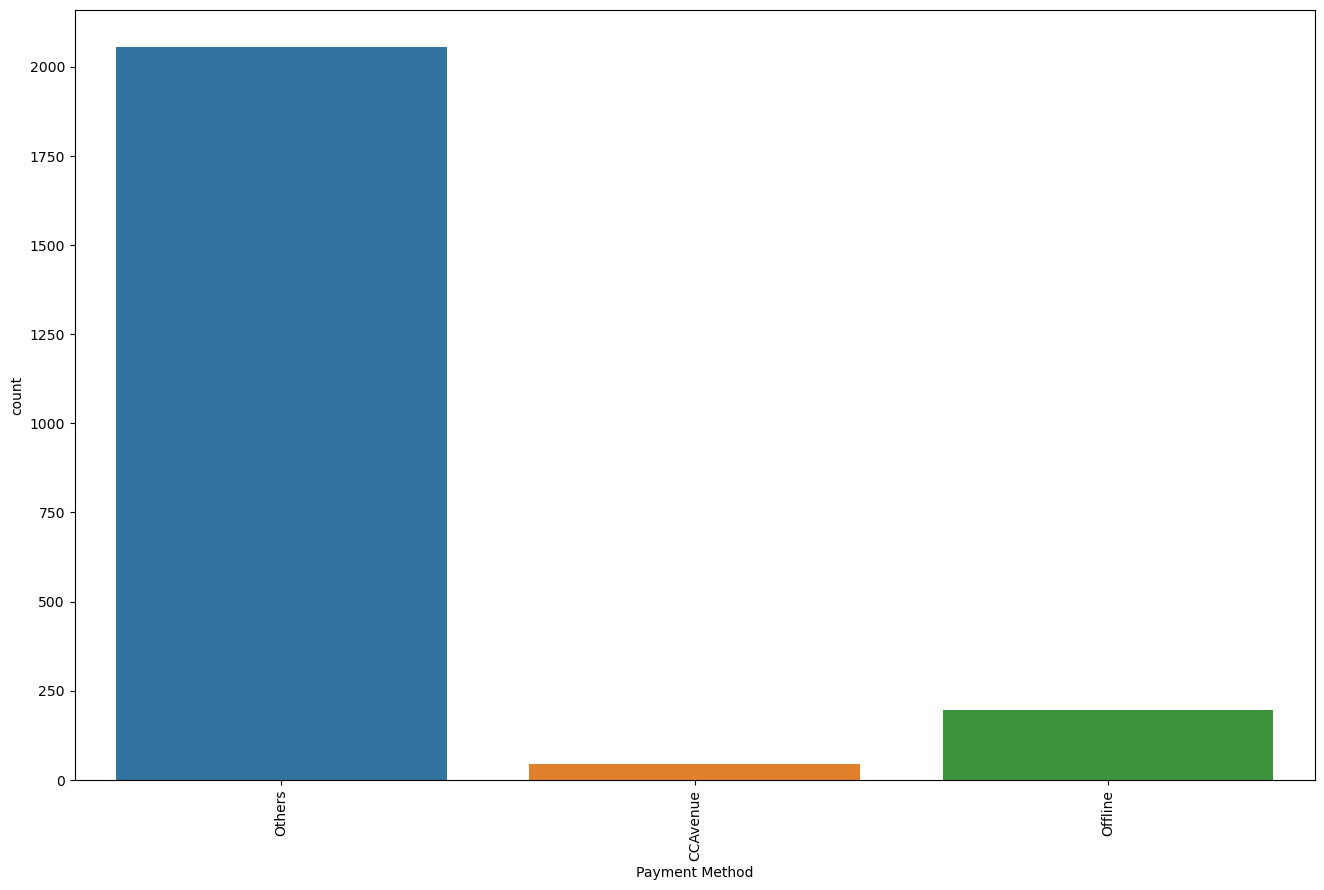

In [41]:
plt.figure(figsize=(16,10))
ax=sns.countplot(df4['Payment Method'])
plt.xticks(rotation=90)

From the above graph we can understand that people are preferring offline payment than ccavenue

### 3.To see the analysis of Top Consumer States of India

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'IN-HR'),
  Text(1, 0, 'IN-AN'),
  Text(2, 0, 'IN-KA'),
  Text(3, 0, 'IN-RJ'),
  Text(4, 0, 'IN-AP'),
  Text(5, 0, 'IN-UP'),
  Text(6, 0, 'IN-MH'),
  Text(7, 0, 'IN-CH'),
  Text(8, 0, 'IN-GJ'),
  Text(9, 0, 'IN-TG'),
  Text(10, 0, 'IN-MP'),
  Text(11, 0, 'IN-TN'),
  Text(12, 0, 'IN-PB'),
  Text(13, 0, 'IN-BR'),
  Text(14, 0, 'IN-UT'),
  Text(15, 0, 'IN-CT'),
  Text(16, 0, 'IN-JK'),
  Text(17, 0, 'IN-WB'),
  Text(18, 0, 'IN-KL'),
  Text(19, 0, 'IN-OR'),
  Text(20, 0, 'IN-JH'),
  Text(21, 0, 'IN-DL'),
  Text(22, 0, 'IN-PY'),
  Text(23, 0, 'IN-AS'),
  Text(24, 0, 'IN-NL'),
  Text(25, 0, 'IN-HP'),
  Text(26, 0, 'IN-TR'),
  Text(27, 0, 'IN-ML'),
  Text(28, 0, 'Others'),
  Text(29, 0, 'IN-DN'),
  Text(30, 0, 'IN-GA'),
  Text(31, 0, 'IN'),
  Text(32, 0, 'IN-MN'),
  Text(33, 0, 'IN-AR'),
  Text(34,

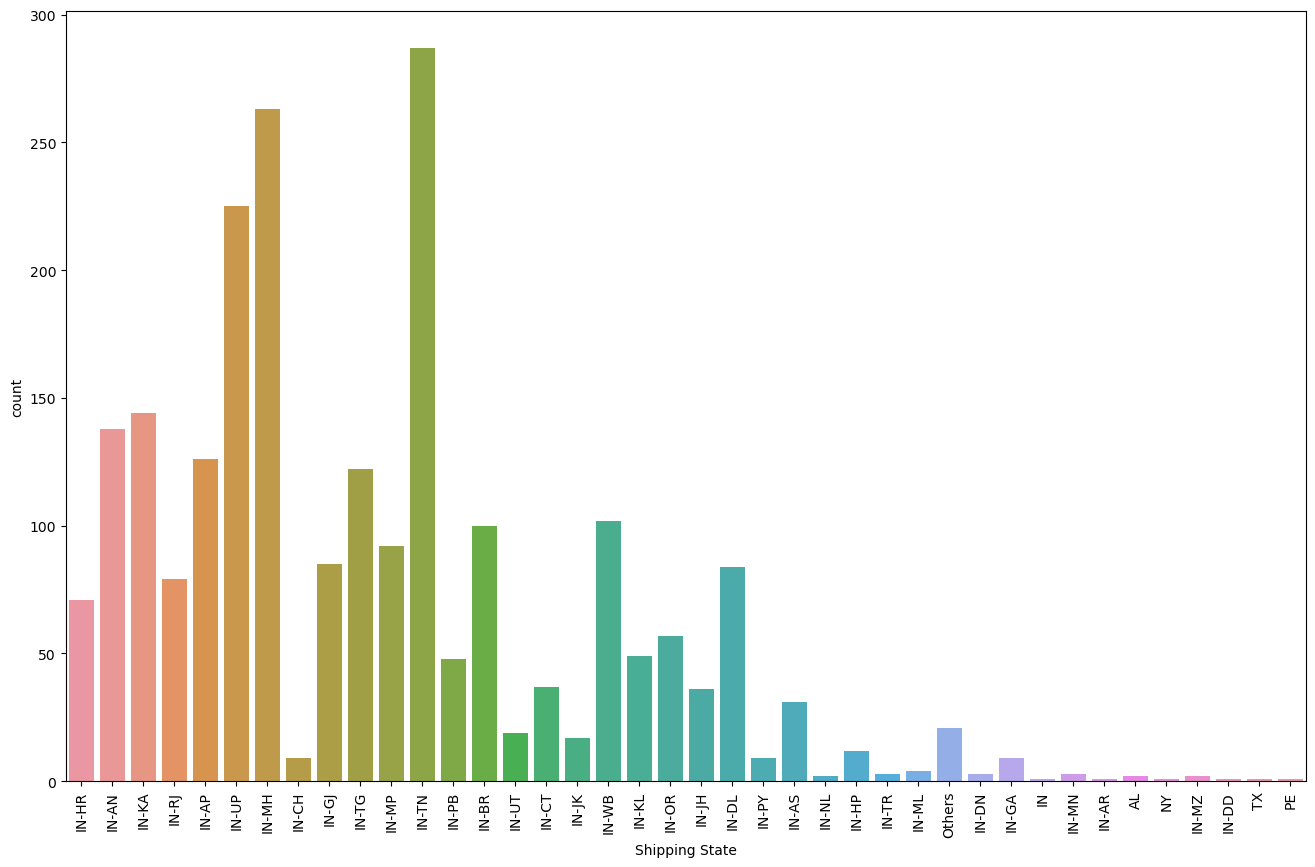

In [42]:
plt.figure(figsize=(16,10))
ax=sns.countplot(df4['Shipping State'])
plt.xticks(rotation=90)

From the graph we can understand that Tamil Nadu is the top consumer state

### 4.To see the analysis of Top Consumer Cities of India

In [43]:
df5=df4[['Shipping City','LineItem Qty']]
df5.drop_duplicates()
df6=df5.groupby(['Shipping City'])['LineItem Qty'].sum()
df6=df6.to_frame()
df6=df6.sort_values('LineItem Qty',ascending=False)
df6.head()


,LineItem Qty
Shipping City,
test,2006
Bhilwara,1000
hotcourses,999
Houston,999
Varanasi,378


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([   0,    1,    2, ..., 1112, 1113, 1114]),
 [Text(0, 0, 'test'),
  Text(1, 0, 'Bhilwara'),
  Text(2, 0, 'hotcourses'),
  Text(3, 0, 'Houston'),
  Text(4, 0, 'Varanasi'),
  Text(5, 0, 'rgtvrg'),
  Text(6, 0, 'Vellore'),
  Text(7, 0, 'Mumbai'),
  Text(8, 0, 'CHENNAI'),
  Text(9, 0, 'Chennai'),
  Text(10, 0, ';lkjhgf'),
  Text(11, 0, 'Bangalore'),
  Text(12, 0, 'Hyderabad'),
  Text(13, 0, 'Pune'),
  Text(14, 0, 'chennai'),
  Text(15, 0, 'MUGHALSARAI, CHANDAULI'),
  Text(16, 0, 'Others'),
  Text(17, 0, 'sadasd'),
  Text(18, 0, 'Coimbatore'),
  Text(19, 0, 'Gorakhpur'),
  Text(20, 0, 'Kolkata'),
  Text(21, 0, 'Ahmedabad'),
  Text(22, 0, 'Delhi'),
  Text(23, 0, 'Charhet'),
  Text(24, 0, 'Patna'),
  Text(25, 0, 'New Delhi'),
  Text(26, 0, 'Guwahati'),
  Text(27, 0, 'Visakhapatnam'),
  Text(28, 0, 'bhilwara'),
  Text(29, 0, 'TAMILNADU'),
  Text(30, 0, 'Lucknow'),
  Text(31, 0, 'Noida'),
  Text(32, 0, 'New delhi'),
  Text(33, 0, 'Faridabad'),
  Text(34, 0, 'gfhgfhjj'),
  Text(35, 0, 'Gu

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2327 (\N{DEVANAGARI LETTER GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\anaconda3\lib\site-packages\

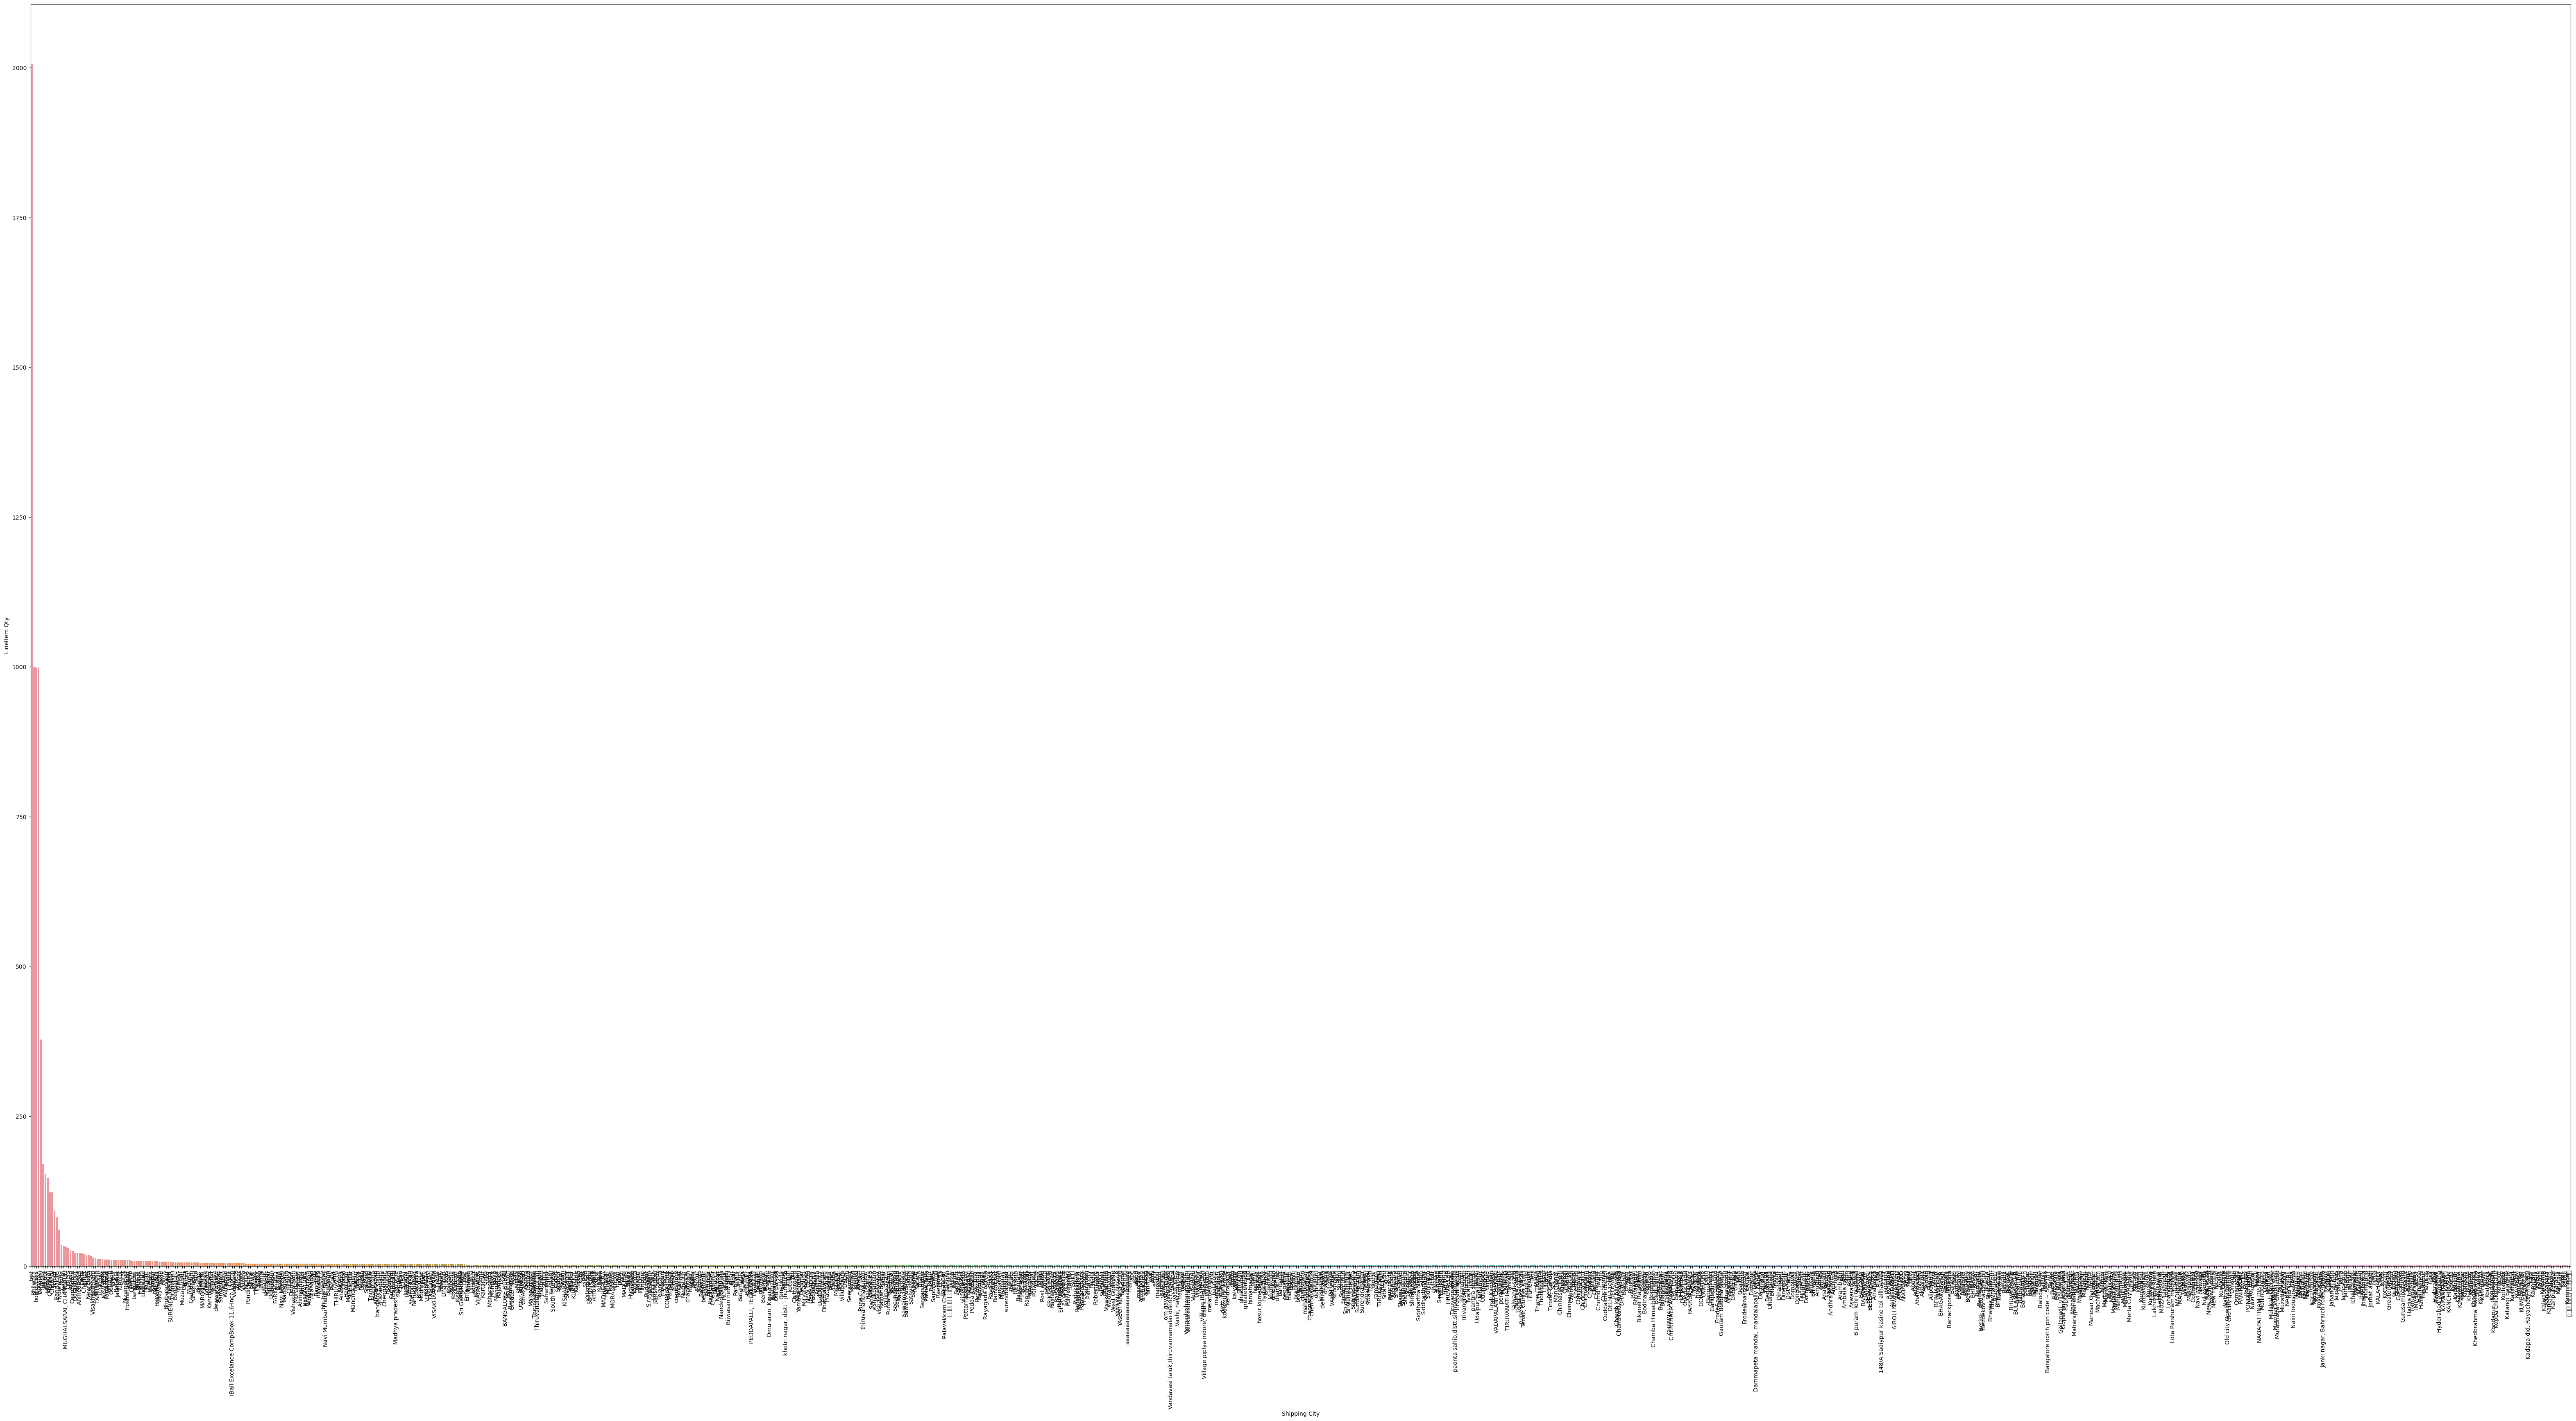

In [44]:
plt.figure(figsize=(80,40))
sns.barplot(df6.index,df6['LineItem Qty'])
plt.xticks(rotation=90)

From the graph and the pivot table we can understand that Bhilwara is the top consumer city in India

### 5.To see the analysis of Top Selling Product Categories

In [45]:
df6=df4[['LineItem Name','LineItem Qty']]
df6.drop_duplicates()
df7=df6.groupby(['LineItem Name'])['LineItem Qty'].sum()
df7=df7.to_frame()
df7=df7.sort_values('LineItem Qty',ascending=False)
df7.head()

,LineItem Qty
LineItem Name,
Ear Wired Earphones With Mic White,2099
Cash On Delivery Services,1012
Bose Quiet Comfort 20 Acoustic Noise Cancelling Headphones (Black),1004
AmbranePowerBank P-1310,1000
Reliance Jio Phone,471


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

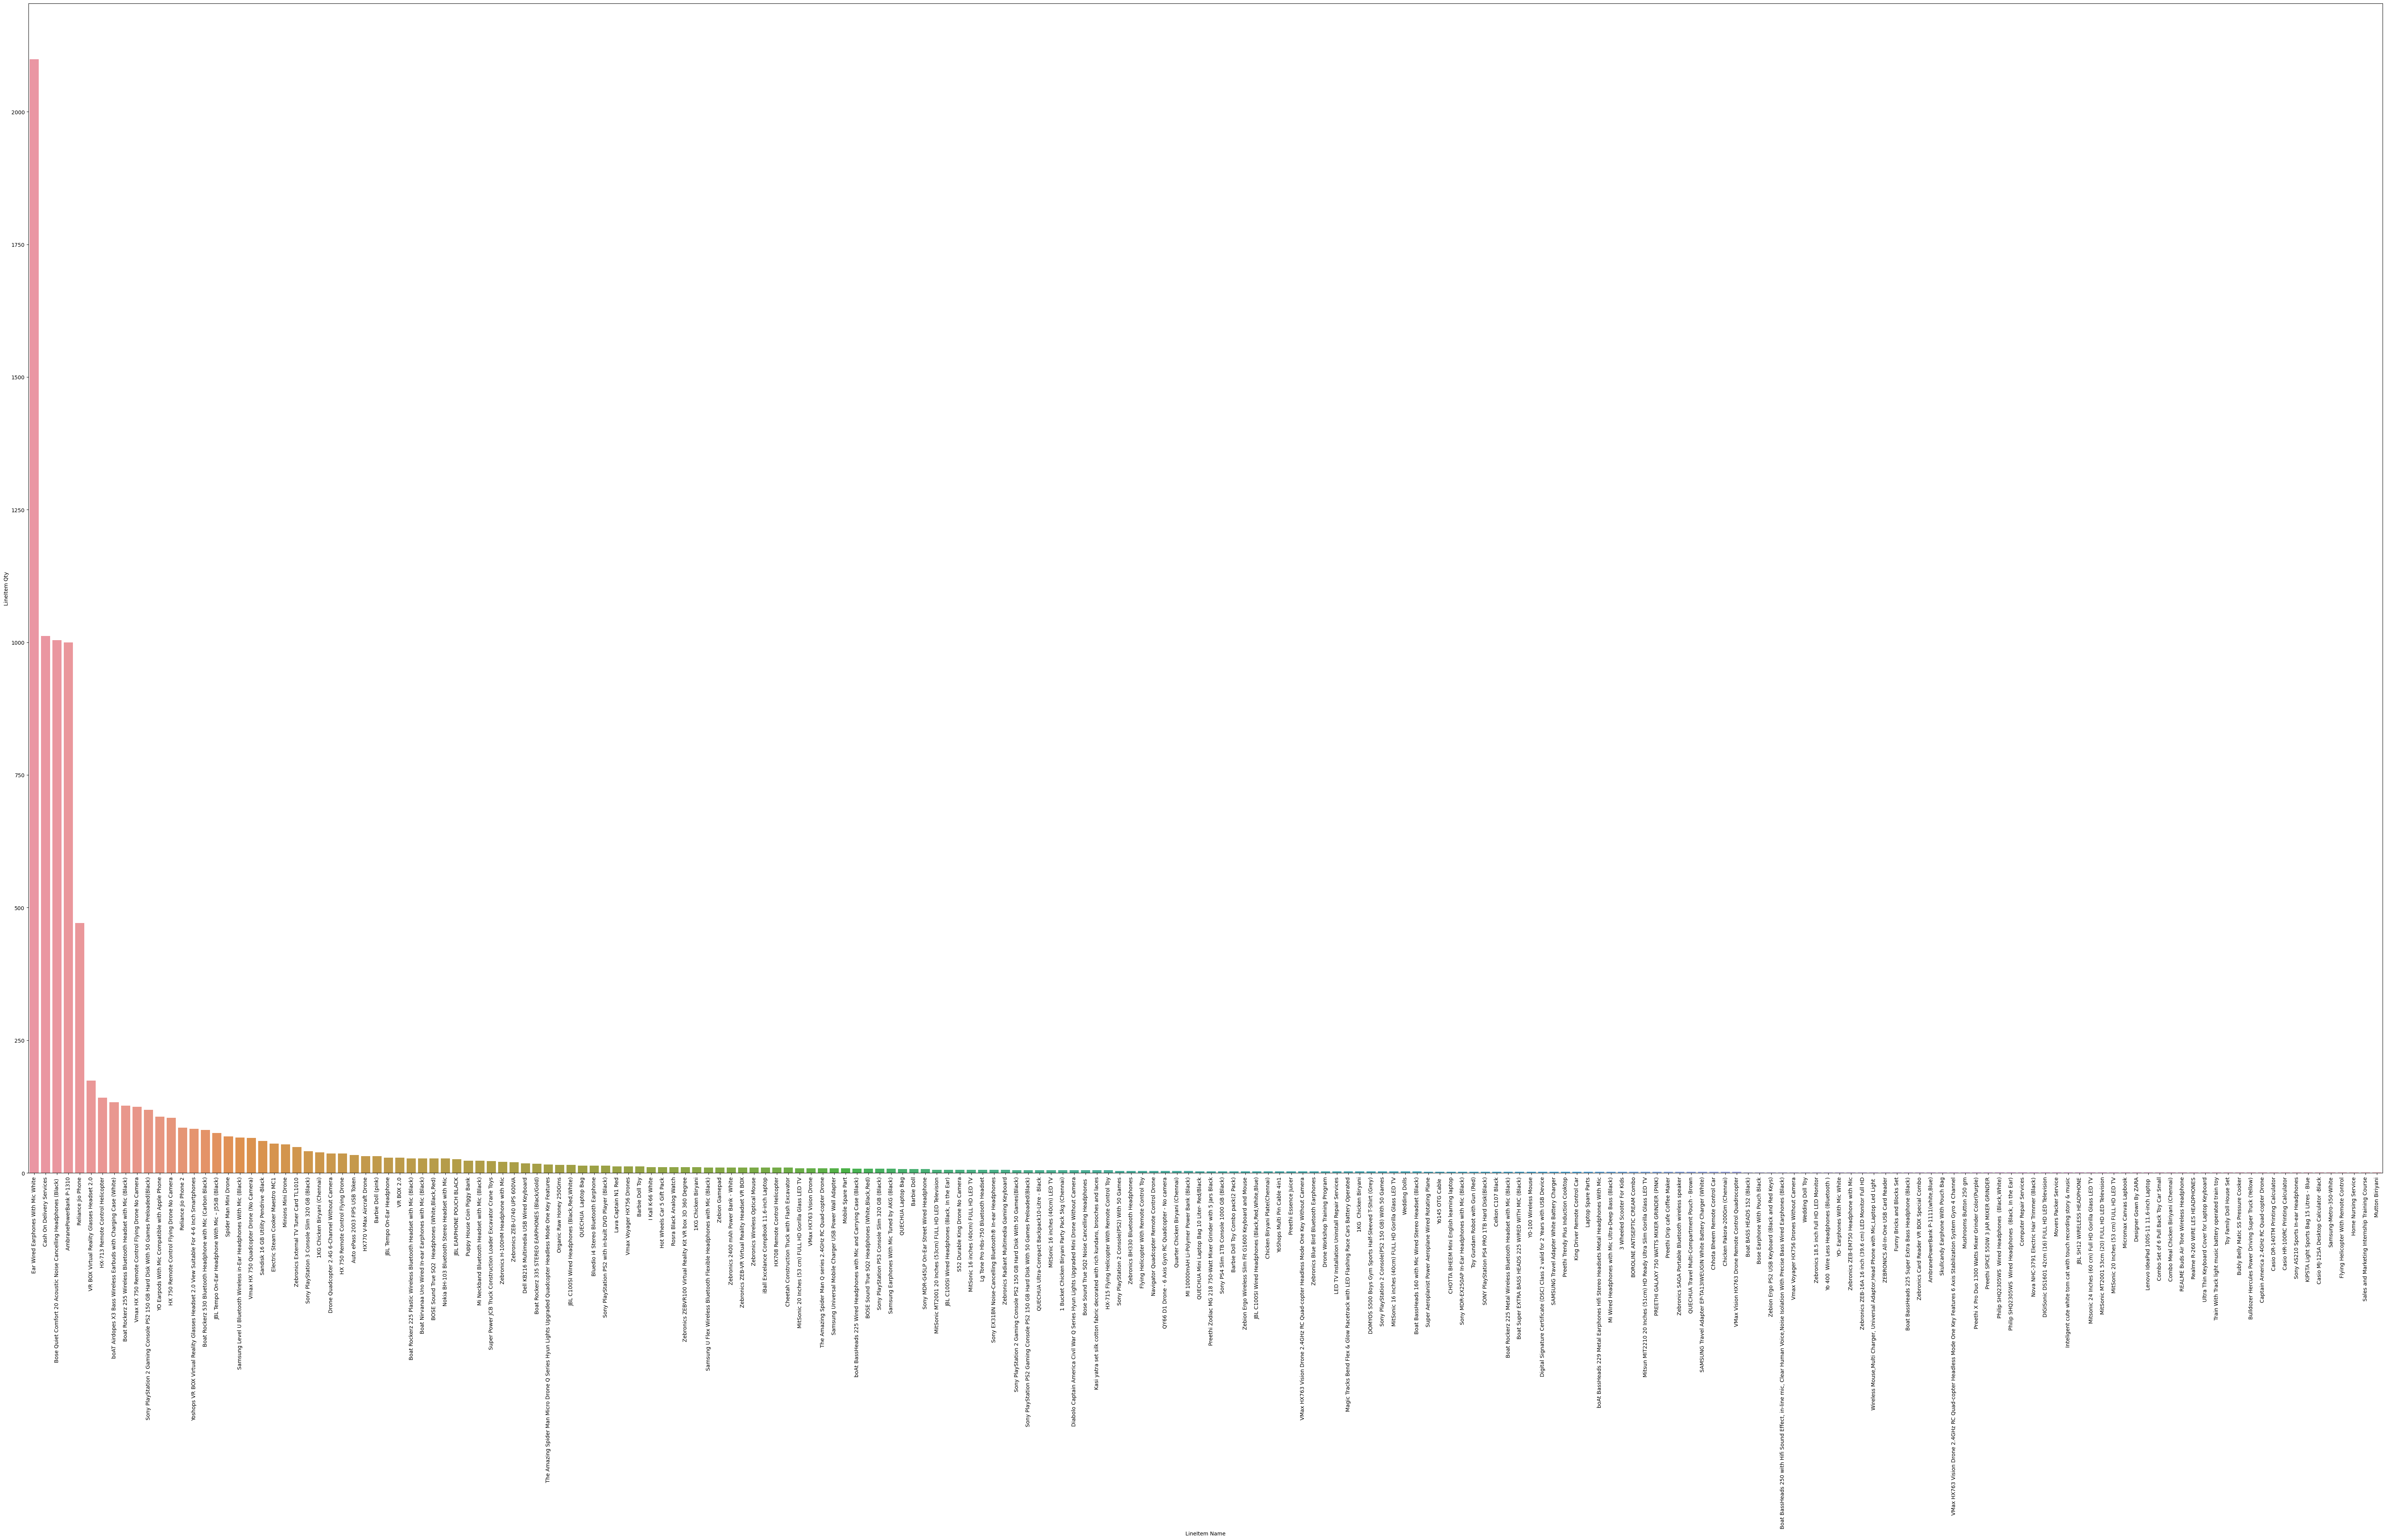

In [46]:
plt.figure(figsize=(80,40))
sns.barplot(df7.index,df7['LineItem Qty'])
plt.xticks(rotation=90)  

From the above graph and pivot table we can understand that Ear Wired Earphones With Mic White is the top selling product

### 7.To see the analysis of Number of Orders Per Month Per Year

In [47]:
df4['year'].unique()

array([2020, 2019, 2018, 2017, 2016], dtype=int64)

In [48]:
df10=df4[df4['year']==2020]

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

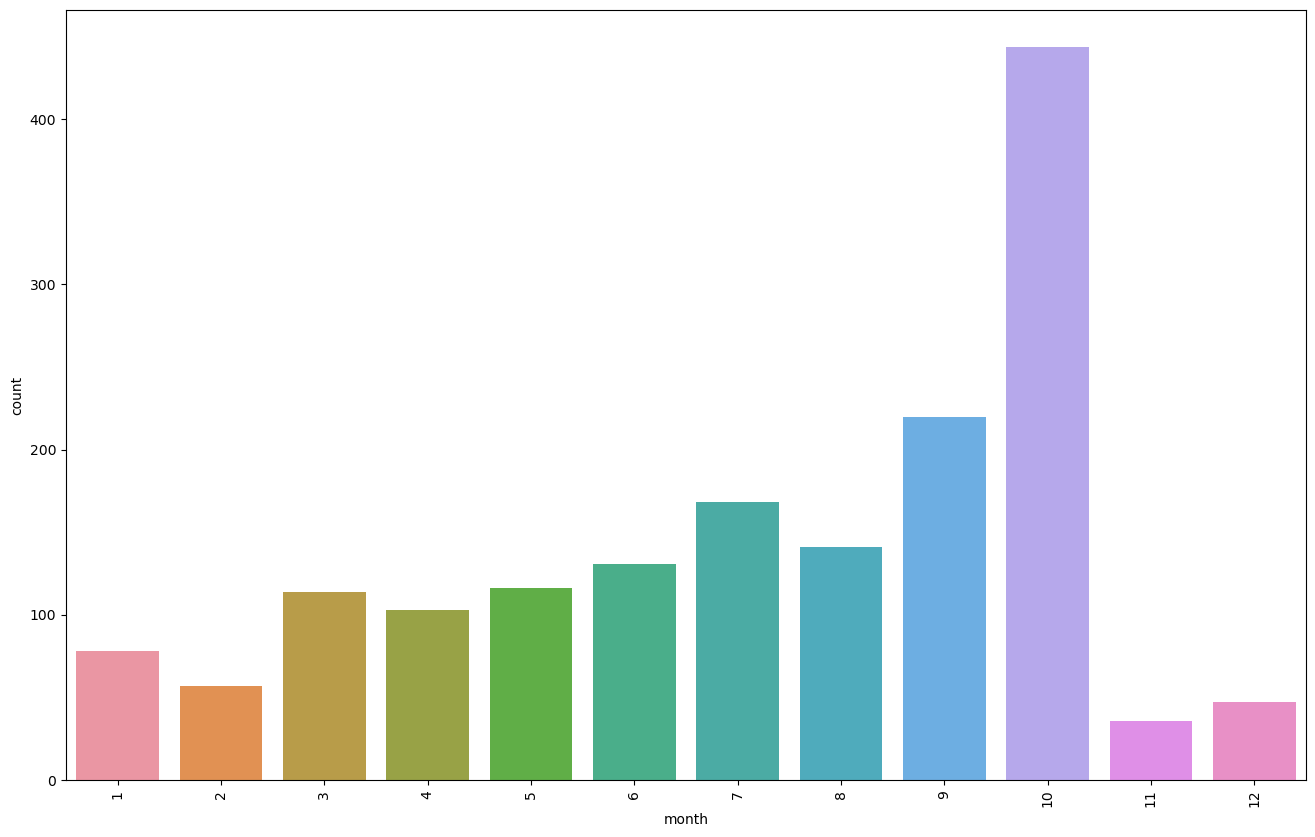

In [49]:
plt.figure(figsize=(16,10))
ax=sns.countplot(df10['month'])
plt.xticks(rotation=90)

On year 2020 more number of orders occured on October

In [50]:
df11=df4[df4['year']==2019]

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

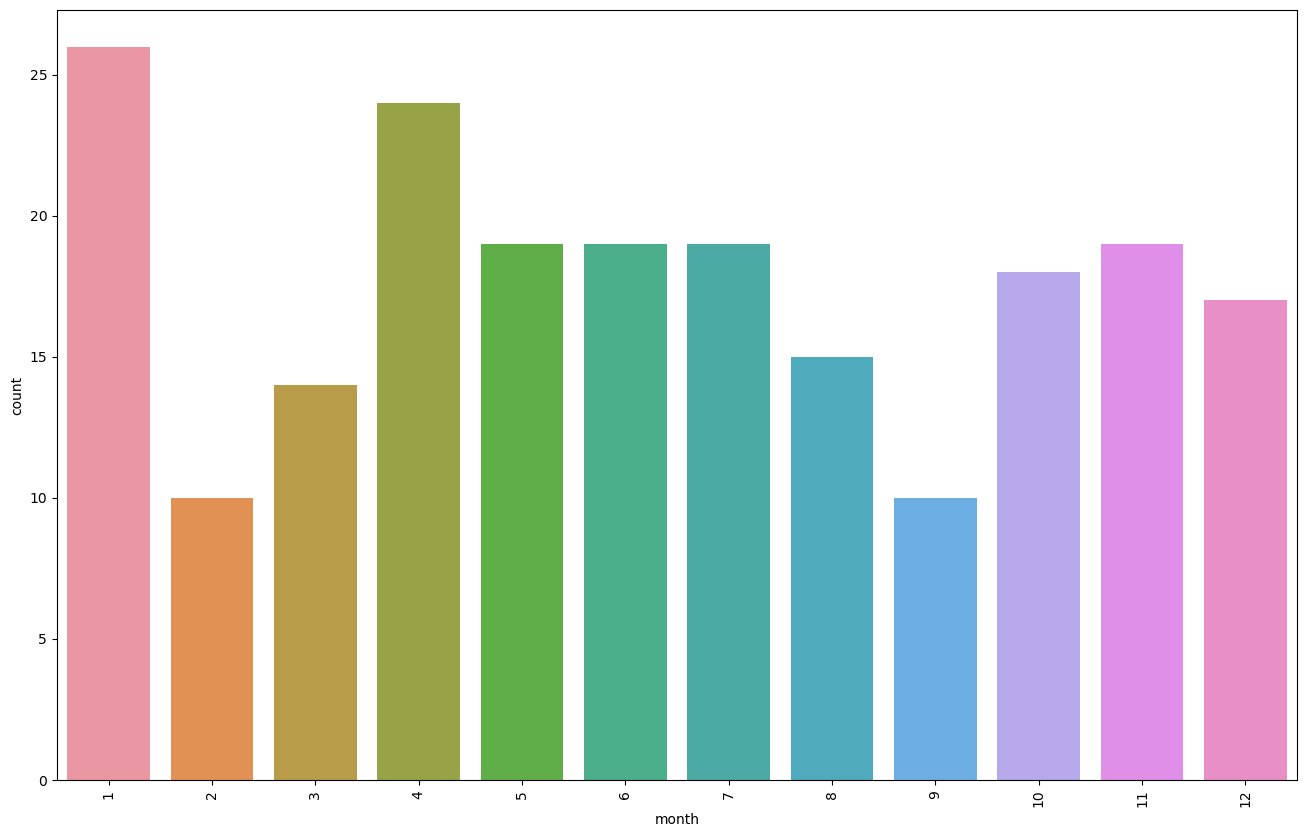

In [51]:
plt.figure(figsize=(16,10))
ax=sns.countplot(df11['month'])
plt.xticks(rotation=90)

On year 2019 more number of orders occured on January

In [52]:
df12=df4[df4['year']==2018]

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

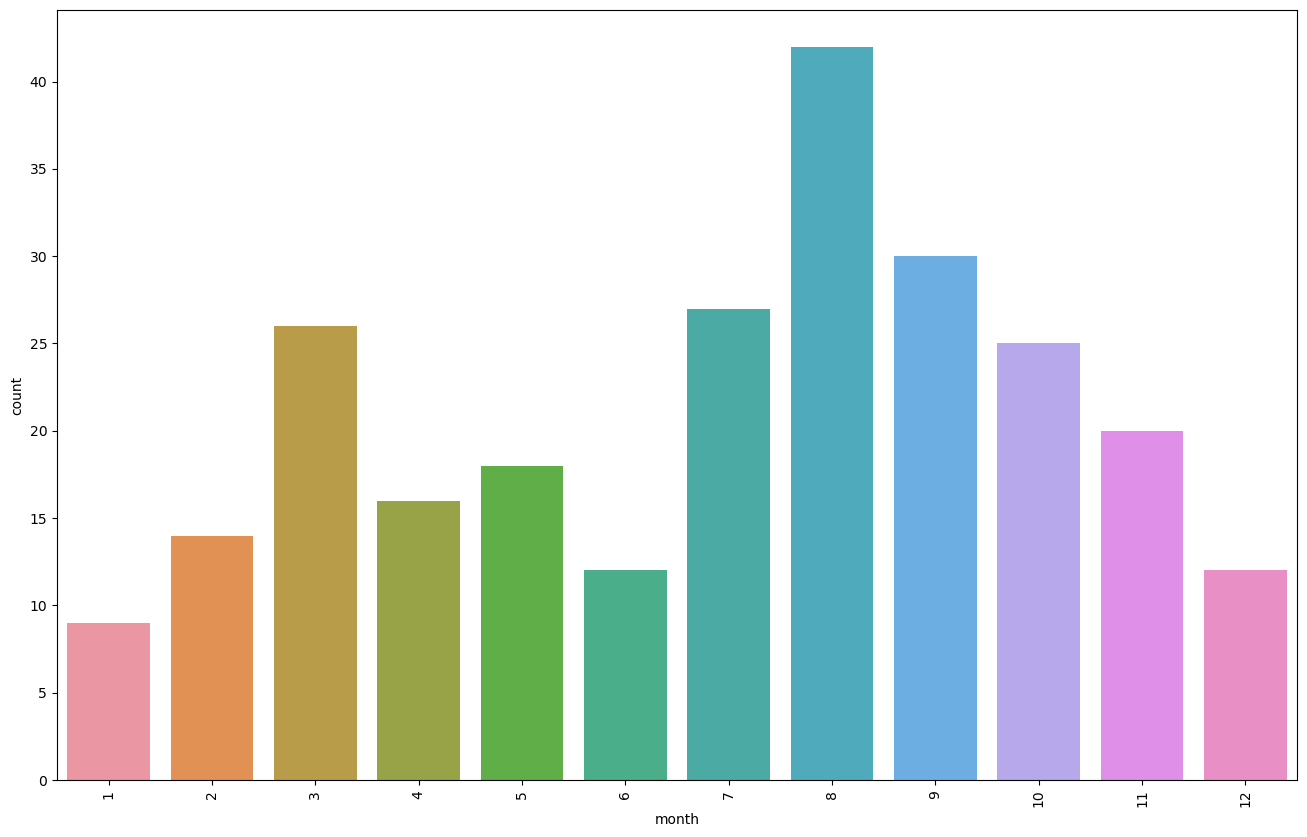

In [53]:
plt.figure(figsize=(16,10))
ax=sns.countplot(df12['month'])
plt.xticks(rotation=90)

On year 2018 more number of orders occured on August

In [54]:
df13=df4[df4['year']==2017]

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

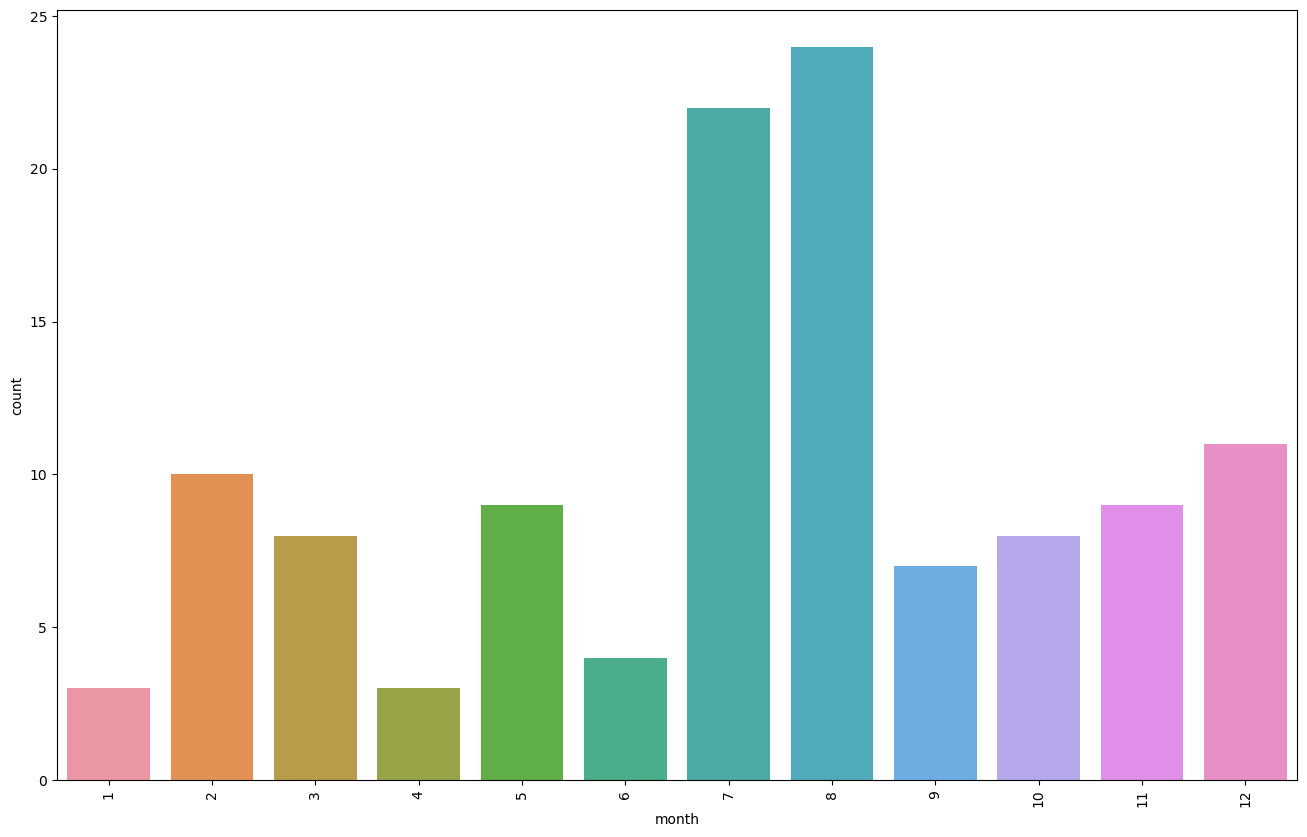

In [55]:
plt.figure(figsize=(16,10))
ax=sns.countplot(df13['month'])
plt.xticks(rotation=90)

 On year 2017 more number of orders occured on August

In [56]:
df14=df4[df4['year']==2016]

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '5'),
  Text(3, 0, '6'),
  Text(4, 0, '7'),
  Text(5, 0, '8'),
  Text(6, 0, '9'),
  Text(7, 0, '10'),
  Text(8, 0, '11'),
  Text(9, 0, '12')])

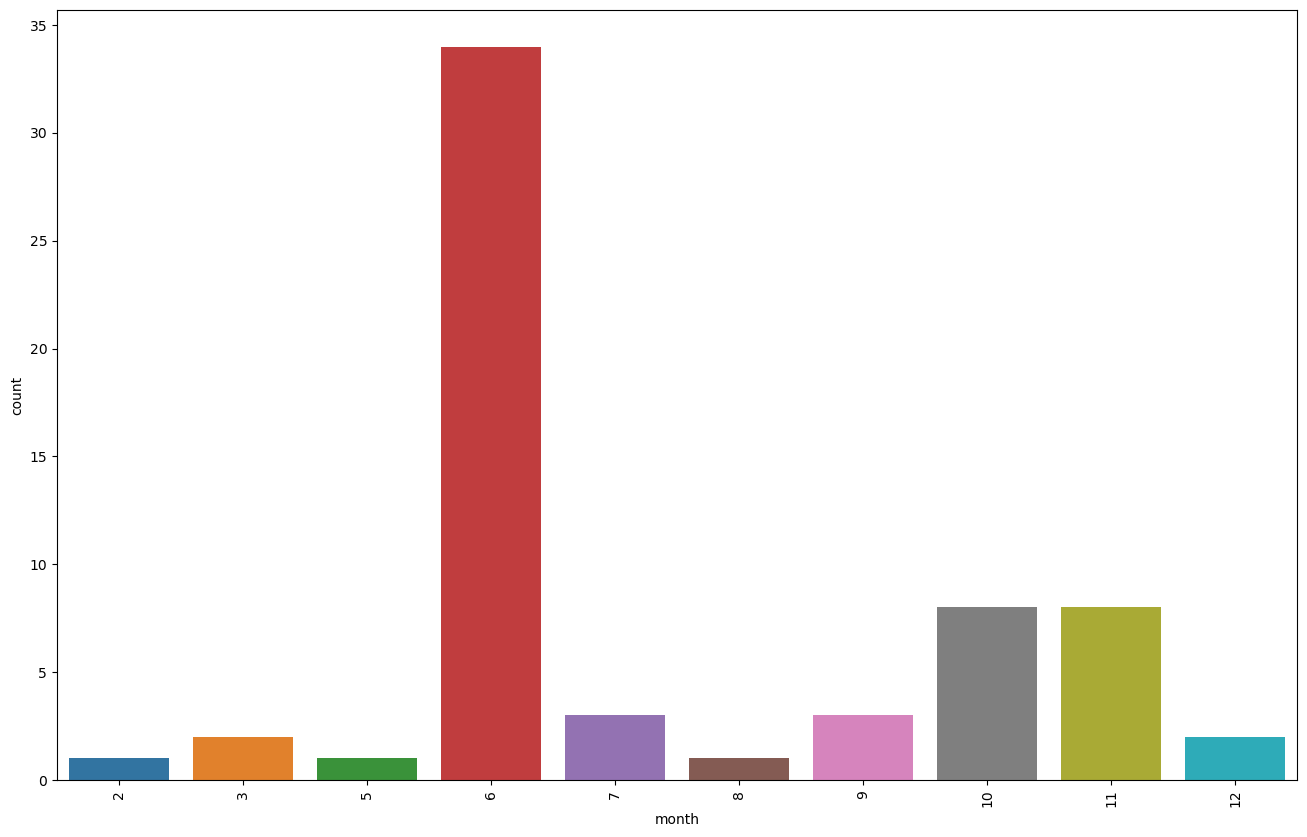

In [57]:
plt.figure(figsize=(16,10))
ax=sns.countplot(df14['month'])
plt.xticks(rotation=90)

 On year 2016 more number of orders occured on June

### 9.To see the analysis of Number of Orders Across Parts of a Day

In [58]:
df4['hour'].unique()

array([20, 19, 18, 16, 15, 14, 12, 11,  7,  5, 22,  4, 23, 21, 13,  8,  2,
       17, 10,  9,  0,  6,  1,  3], dtype=int64)

In [59]:
#Making a column named part_of_day
part_of_day=df4['hour']
df4['part_of_day']=part_of_day
df4.head(10)

,Order #,Payment Status,Total,Discount,Billing Country,Billing City,Billing State,Shipping Country,Shipping City,Shipping State,Payment Method,LineItem Name,LineItem Qty,LineItem Sale Price,year,month,day,hour,part_of_day
0,R929392577,Unpaid,₹ 799.00,₹ 0.00,Others,Others,Others,IND,Gurgaon,IN-HR,Others,Boat Rockerz 530 Bluetooth Headphone with Mic ...,1,₹ 799.00,2020,9,11,20,20
1,R653462960,Unpaid,₹ 699.00,₹ 0.00,Others,Others,Others,IND,Maharashtra,IN-AN,Others,Samsung U Flex Wireless Bluetooth Flexible Hea...,1,₹ 699.00,2020,9,11,20,20
2,R226302759,Unpaid,₹ 799.00,₹ 0.00,Others,Others,Others,IND,Bangalore,IN-KA,Others,Boat Rockerz 530 Bluetooth Headphone with Mic ...,1,₹ 799.00,2020,9,11,19,19
3,R390235057,Unpaid,₹ 599.00,₹ 0.00,Others,Others,Others,IND,Merta City nagaur,IN-RJ,Others,JBL Tempo On-Ear Headphone,1,₹ 599.00,2020,9,11,19,19
4,R813855117,Paid,₹ 699.00,₹ 0.00,Others,Others,Others,IND,X,IN-AN,Others,Mi Neckband Bluetooth Headset with Mic (Black),1,₹ 699.00,2020,9,11,18,18
5,R754638660,Paid,₹ 999.00,₹ 0.00,Others,Others,Others,IND,Kothapeta,IN-AP,Others,boAT Airdopes X3 Bass Wireless Earbuds with Ch...,1,₹ 999.00,2020,9,11,16,16
6,R513882916,Paid,₹ 999.00,₹ 0.00,IND,Allahabad,IN-UP,IND,Allahabad,IN-UP,Others,boAT Airdopes X3 Bass Wireless Earbuds with Ch...,1,₹ 999.00,2020,9,11,16,16
7,R224377947,Paid,₹ 999.00,₹ 0.00,Others,Others,Others,IND,"Kovur,nellore",IN-AP,Others,boAT Airdopes X3 Bass Wireless Earbuds with Ch...,1,₹ 999.00,2020,9,11,16,16
8,R159044399,Unpaid,₹ 799.00,₹ 0.00,Others,Others,Others,IND,Dombivali,IN-MH,Others,Boat Rockerz 255 Wireless Bluetooth Headset wi...,1,₹ 799.00,2020,9,11,15,15
9,R582285083,Paid,₹ 799.00,₹ 0.00,Others,Others,Others,IND,Visakhapatnam,IN-AP,Others,Boat Rockerz 530 Bluetooth Headphone with Mic ...,1,₹ 799.00,2020,9,11,14,14


In [60]:
#categorizing time of day based on hours
def handlehrs(value):
    if(5<=value<12):
        return('morning')
    elif(12<=value<17):
        return('after noon')
    elif(17<=value<21):
        return('evening')
    else:
        return('night')

df4['part_of_day']=df4['part_of_day'].apply(handlehrs)

df4['part_of_day'].head() 

0    evening
1    evening
2    evening
3    evening
4    evening
Name: part_of_day, dtype: object

In [61]:
df4.head()

,Order #,Payment Status,Total,Discount,Billing Country,Billing City,Billing State,Shipping Country,Shipping City,Shipping State,Payment Method,LineItem Name,LineItem Qty,LineItem Sale Price,year,month,day,hour,part_of_day
0,R929392577,Unpaid,₹ 799.00,₹ 0.00,Others,Others,Others,IND,Gurgaon,IN-HR,Others,Boat Rockerz 530 Bluetooth Headphone with Mic ...,1,₹ 799.00,2020,9,11,20,evening
1,R653462960,Unpaid,₹ 699.00,₹ 0.00,Others,Others,Others,IND,Maharashtra,IN-AN,Others,Samsung U Flex Wireless Bluetooth Flexible Hea...,1,₹ 699.00,2020,9,11,20,evening
2,R226302759,Unpaid,₹ 799.00,₹ 0.00,Others,Others,Others,IND,Bangalore,IN-KA,Others,Boat Rockerz 530 Bluetooth Headphone with Mic ...,1,₹ 799.00,2020,9,11,19,evening
3,R390235057,Unpaid,₹ 599.00,₹ 0.00,Others,Others,Others,IND,Merta City nagaur,IN-RJ,Others,JBL Tempo On-Ear Headphone,1,₹ 599.00,2020,9,11,19,evening
4,R813855117,Paid,₹ 699.00,₹ 0.00,Others,Others,Others,IND,X,IN-AN,Others,Mi Neckband Bluetooth Headset with Mic (Black),1,₹ 699.00,2020,9,11,18,evening


In [62]:
df4['part_of_day'].unique()

array(['evening', 'after noon', 'morning', 'night'], dtype=object)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3]),
 [Text(0, 0, 'evening'),
  Text(1, 0, 'after noon'),
  Text(2, 0, 'morning'),
  Text(3, 0, 'night')])

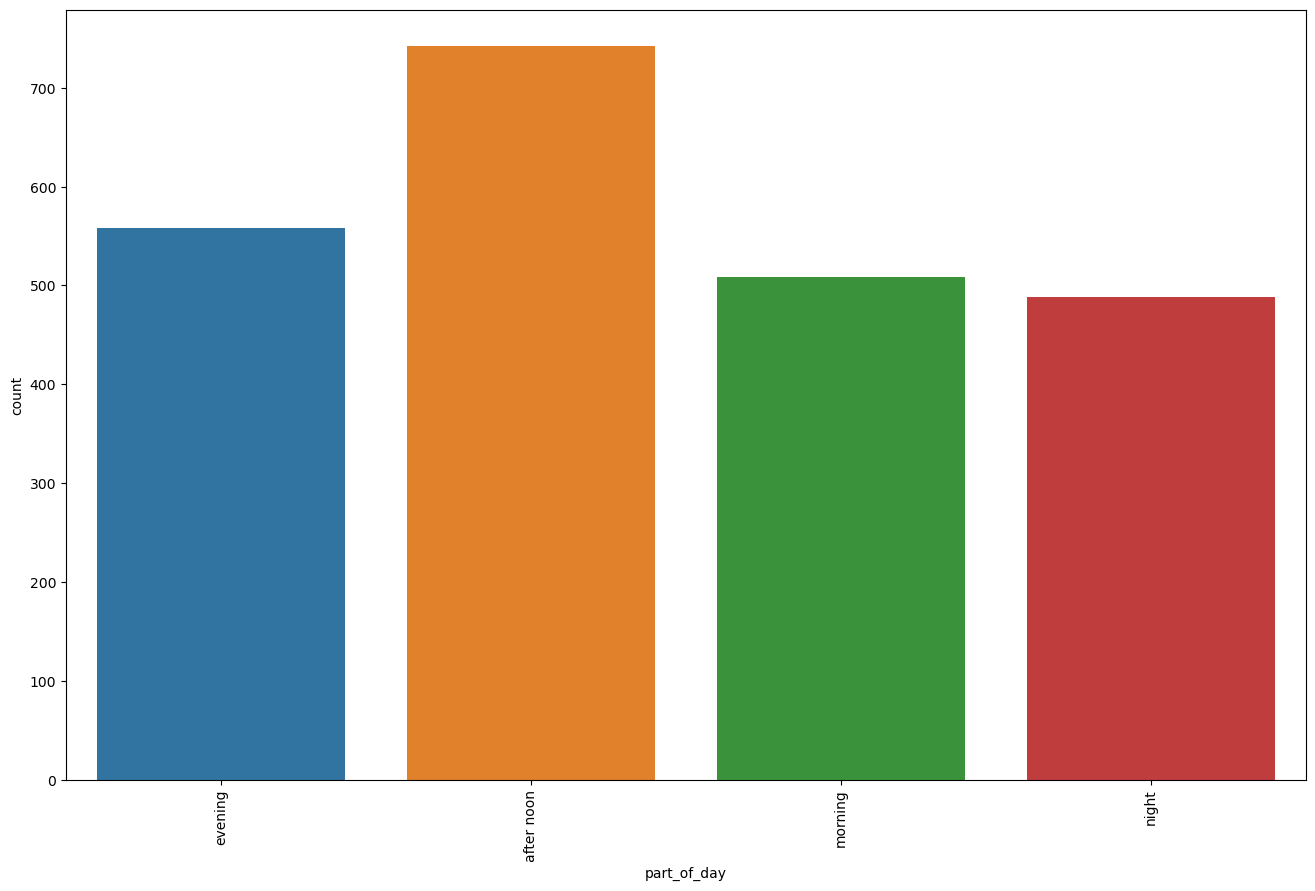

In [63]:
plt.figure(figsize=(16,10))
ax=sns.countplot(df4['part_of_day'])
plt.xticks(rotation=90)

From the above graph we can say that more orders occur during afternoon and less during night